In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt




In [31]:
# Reads the race qualifying results csv
qualifying_results_df = pd.read_csv('../f1db_data/f1db-races-qualifying-results.csv')
qualifying_results_df

,raceId,year,round,positionDisplayOrder,positionNumber,positionText,driverNumber,driverId,constructorId,engineManufacturerId,...,q1Millis,q2,q2Millis,q3,q3Millis,gap,gapMillis,interval,intervalMillis,laps
0,1,1950,1,1,1.0,1,2,nino-farina,alfa-romeo,alfa-romeo,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1950,1,2,2.0,2,3,luigi-fagioli,alfa-romeo,alfa-romeo,...,NaN,NaN,NaN,NaN,NaN,+0.200,200.0,+0.200,200.0,NaN
2,1,1950,1,3,3.0,3,1,juan-manuel-fangio,alfa-romeo,alfa-romeo,...,NaN,NaN,NaN,NaN,NaN,+0.200,200.0,+0.000,0.0,NaN
3,1,1950,1,4,4.0,4,4,reg-parnell,alfa-romeo,alfa-romeo,...,NaN,NaN,NaN,NaN,NaN,+1.400,1400.0,+1.200,1200.0,NaN
4,1,1950,1,5,5.0,5,21,birabongse-bhanudej,maserati,maserati,...,NaN,NaN,NaN,NaN,NaN,+1.800,1800.0,+0.400,400.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26291,1128,2025,3,16,16.0,16,27,nico-hulkenberg,kick-sauber,ferrari,...,88570.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0
26292,1128,2025,3,17,17.0,17,5,gabriel-bortoleto,kick-sauber,ferrari,...,88622.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0
26293,1128,2025,3,18,18.0,18,31,esteban-ocon,haas,ferrari,...,88696.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0
26294,1128,2025,3,19,19.0,19,7,jack-doohan,alpine,renault,...,88877.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0


In [29]:
# Reads the drivers csv
drivers_df = pd.read_csv('../f1db_data/f1db-drivers.csv')
drivers_df

,id,name,firstName,lastName,fullName,abbreviation,permanentNumber,gender,dateOfBirth,dateOfDeath,...,totalRaceStarts,totalRaceWins,totalRaceLaps,totalPodiums,totalPoints,totalChampionshipPoints,totalPolePositions,totalFastestLaps,totalDriverOfTheDay,totalGrandSlams
0,adderly-fong,Adderly Fong,Adderly,Fong,Adderly Fong Cheun-yue,FON,NaN,MALE,1990-03-02,NaN,...,0,0,0,0,0.0,0.0,0,0,0,0
1,adolf-brudes,Adolf Brudes,Adolf,Brudes,Adolf Brudes von Breslau,BRU,NaN,MALE,1899-10-15,1986-11-05,...,1,0,5,0,0.0,0.0,0,0,0,0
2,adolfo-schwelm-cruz,Adolfo Schwelm Cruz,Adolfo,Schwelm Cruz,Adolfo Julio Carlos Schwelm Cruz,SCH,NaN,MALE,1923-06-28,2012-02-10,...,1,0,20,0,0.0,0.0,0,0,0,0
3,adrian-campos,Adrián Campos,Adrián,Campos,Adrián Campos Suñer,CAM,NaN,MALE,1960-06-17,2021-01-27,...,17,0,433,0,0.0,0.0,0,0,0,0
4,adrian-sutil,Adrian Sutil,Adrian,Sutil,Adrian Sutil,SUT,NaN,MALE,1983-01-11,NaN,...,128,0,6022,0,124.0,124.0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,yuji-ide,Yuji Ide,Yuji,Ide,Yuji Ide,IDE,NaN,MALE,1975-01-21,NaN,...,4,0,145,0,0.0,0.0,0,0,0,0
903,yuki-tsunoda,Yuki Tsunoda,Yuki,Tsunoda,Yuki Tsunoda,TSU,22.0,MALE,2000-05-11,NaN,...,90,0,4795,0,94.0,94.0,0,1,2,0
904,yves-giraud-cabantous,Yves Giraud-Cabantous,Yves,Giraud-Cabantous,Marius Aristide Yves Giraud-Cabantous,CAB,NaN,MALE,1904-10-08,1973-03-30,...,13,0,522,0,5.0,5.0,0,0,0,0
905,zak-osullivan,Zak O'Sullivan,Zak,O'Sullivan,Zak O'Sullivan,OSU,NaN,MALE,2005-02-06,NaN,...,0,0,0,0,0.0,0.0,0,0,0,0


In [61]:
drivers_pole_positions = qualifying_results_df.merge(drivers_df, right_on = 'id', left_on = 'driverId', how = 'left')
drivers_pole_positions = drivers_pole_positions[drivers_pole_positions['positionNumber'] == 1]
drivers_pole_positions = drivers_pole_positions.groupby(['lastName', 'firstName', 'positionNumber']).size().reset_index(name = 'count')
drivers_pole_positions['full_name'] = drivers_pole_positions['firstName'] + ' ' + drivers_pole_positions['lastName']
drivers_pole_positions = drivers_pole_positions[drivers_pole_positions['count'] >= 5].sort_values('count', ascending=False)
drivers_pole_positions

,lastName,firstName,positionNumber,count,full_name
36,Hamilton,Lewis,1.0,105,Lewis Hamilton
90,Schumacher,Michael,1.0,69,Michael Schumacher
92,Senna,Ayrton,1.0,65,Ayrton Senna
101,Vettel,Sebastian,1.0,57,Sebastian Vettel
100,Verstappen,Max,1.0,45,Max Verstappen
74,Prost,Alain,1.0,33,Alain Prost
20,Clark,Jim,1.0,33,Jim Clark
59,Mansell,Nigel,1.0,32,Nigel Mansell
84,Rosberg,Nico,1.0,30,Nico Rosberg
26,Fangio,Juan Manuel,1.0,29,Juan Manuel Fangio


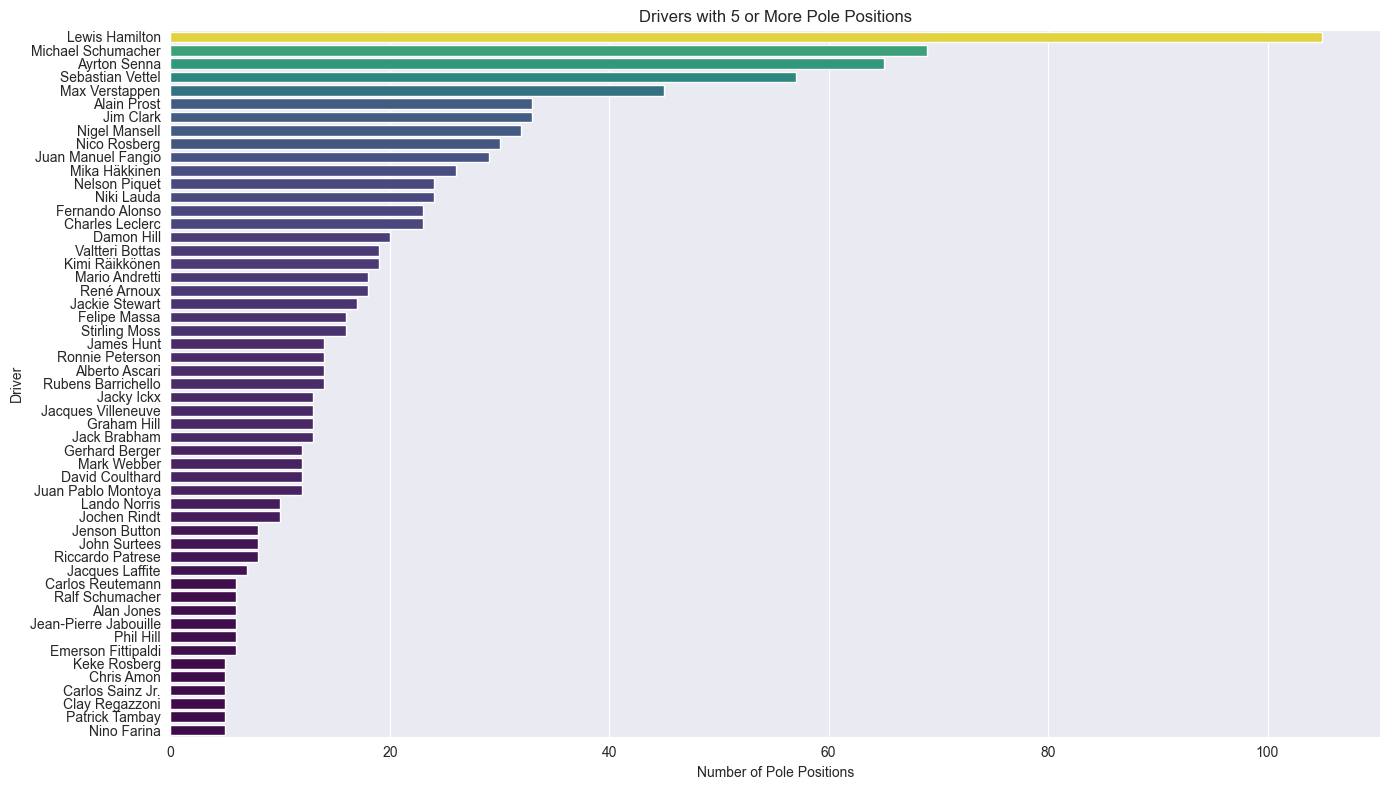

In [62]:
plt.figure(figsize=(14, 8))
sns.barplot(data=drivers_pole_positions, x='count', y='full_name', hue='count', palette='viridis', dodge=False)
plt.xlabel('Number of Pole Positions')
plt.ylabel('Driver')
plt.title('Drivers with 5 or More Pole Positions')
plt.legend().remove()
plt.tight_layout()
plt.show()